## Classification template
**RELU** --->  **hidden activation function** for both binary and multi class classification.

For binary classification the output activation function can be **Sigmoid**. For multiclass classification the output activation function can be **Softmax**.

**Cross Entropy** -----> **Loss function** for both binary and multi class classification.

**Input Layer shape** ----> Same as the number of features.(Eg: 5 for age, sex, height, weight, smoking status in heart disease prediction)

**Output layer shape** -----> 1 per class. (Eg: 3 for cat, dog and rabbit)

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.datasets import make_circles
n_samples = 1000
X,y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


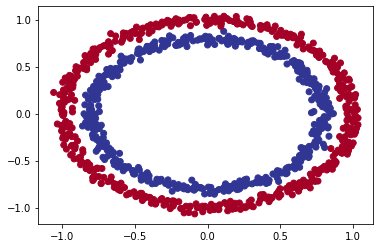

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y ,cmap=plt.cm.RdYlBu);

### Input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

### Create a classification model
The steps involved in creating a model in tensorflow are
* Create or import a model
* Compile the model
* Fit the model
* Evaluate the model
* Tweak the model
* Evaluate ...

In [ ]:
tf.random.set_seed(42)

# Create the model using Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                              
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5157


As we can see from the above model, the accuracy we got is nearly 51% which is not a good model as it is basically guess work. 

In [ ]:
# Let's try and improve the accuracy of the model by including more epochs
model_1.fit(X, y, epochs=200, verbose = 0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 996us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

In [ ]:
#let's increase the hidden layer
tf.random.set_seed(42)

# Create the model using Sequential API
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                            
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 3.1579 - accuracy: 0.4602
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6995 - accuracy: 0.4902
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6967 - accuracy: 0.4767
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5016
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4894


In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6939 - accuracy: 0.5580


[0.693947434425354, 0.5580000281333923]

In [ ]:
# We improve our model by following the classification template which is given in the first text cell
tf.random.set_seed(42)

# Create the model using Sequential API
model_3 = tf.keras.Sequential([
  tf.keras.Input(shape=(1000,2,1)),
  tf.keras.layers.Dense(100,activation="relu"),
  tf.keras.layers.Dense(2, activation = "softmax")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

# Fit the model
model_3.fit(X, y, epochs=5, verbose=0)

# Evaluate the model
model_3.evaluate(X, y)

ValueError: ignored

To visualise our model's predictions, let's create a function **plot_decision_boundary()**, this function will:
* Take a trained model, features(X) and labels(y).
* Create a mesh grid of different X values.
* Make predictions across the mesh grid.
* Plot the predictions as well as line between zones(where each unique class falls)


In [ ]:
tf.random.set_seed(42)

# Create the model using Sequential API
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980252861976624, 0.5080000162124634]

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  
  #linspace ====> Takes 3 parameters (start, end, no.of elements). Gives equally spaced elements from starting to end based
  # on the no.elements
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if(len(y_pred[0]) > 1):
    print("Doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Doing binary classification


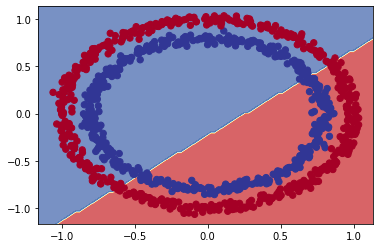

In [ ]:
plot_decision_boundary(model = model_3, X=X, y=y)

As we can see from the above image the line is trying to divide the points like in linear regression. but in our dataset the data is spherical. We can't divide it with a straight line.

Let;s see if we can apply this to a regression problem

In [ ]:
X_regression = tf.range(0 , 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_regression_train = X_regression[:150]
X_regression_test = X_regression[150:]

y_regression_train = y_regression[:150]
y_regression_test = y_regression[150:]

In [ ]:
tf.random.set_seed(42)

# Create the model using Sequential API
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["mae"])

# Fit the model
model_4.fit(X_regression_train, y_regression_train, epochs=100, verbose=0)

# Evaluate the model
model_4.evaluate(X_regression_test, y_regression_test)

2/2 [==============================] - 0s 6ms/step - loss: 57.8927 - mae: 57.8927


[57.892662048339844, 57.892662048339844]

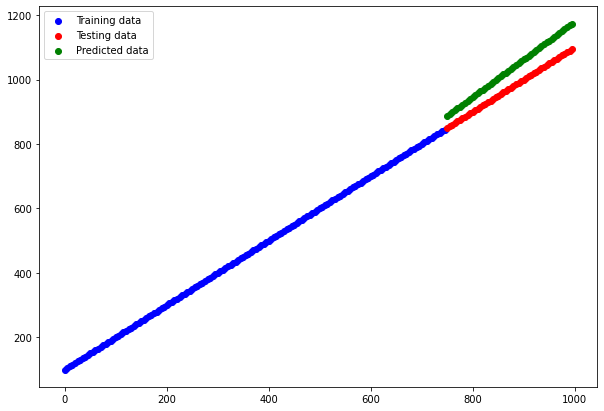

In [ ]:
y_regression_pred = model_4.predict(X_regression_test)

#Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_regression_train,y_regression_train,c="b", label="Training data")
plt.scatter(X_regression_test, y_regression_test, c="r", label="Testing data")
plt.scatter(X_regression_test, y_regression_pred, c="g", label="Predicted data")
plt.legend();

### Dealing with Non-collinearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
)

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7724 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9616 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6369 - accuracy: 0.4227
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9298 - accuracy: 0.3950
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5803 - accuracy: 0.4409
Epoch 11/

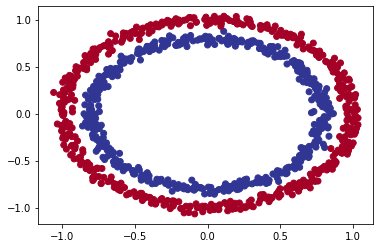

In [ ]:
# Check out data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

Doing binary classification


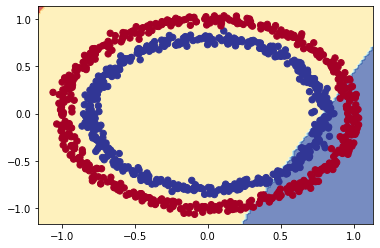

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

As we can see from the above graph the red points belong to the red coloured area which is very less(top left corner) and the blue are belongs to the blue dots. The remaining large portion belongs to both red and blue points. This area is so big and this is the reason why our model's accuracy is below 50%. This is because we have used a linear activation function. 

**Let's try a non-linear activation function**

Types of activation functions:

* ReLU
* Tanh
* Sigmoid 
* Linear


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1.Create the model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation="relu")
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7724 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9616 - accuracy: 0.4212
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6369 - accuracy: 0.4227
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9298 - accuracy: 0.3950
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5803 - accuracy: 0.4409
Epoch 11/

In [ ]:
# Not a right approach to evaluate the model based on train data itself.
model_5.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 3.2448 - accuracy: 0.4560


[3.2447562217712402, 0.4560000002384186]

Doing binary classification


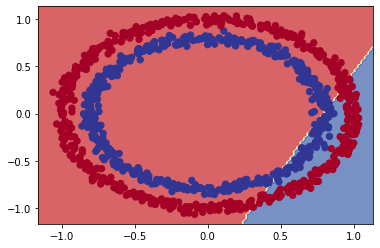

In [ ]:
# Check decision boundary for latest model
plot_decision_boundary(model=model_5, X=X, y=y)

We can play around with tensorflow playground alter whatever parameters we want. Out motto is to reduce the test loss and to see whether our orange and blue dots are classified correctly. As we can see while running with activation="relu", 2 hidden layers and 4 neurons per layer and over 2000 epochs there is a distinct split between the 2 groups.

Check for 2nd tensorflow mrdbrouke video 18th minute  

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
)

# 3. Fit the model
history = model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 7.9753 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.8983 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 7.8184 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7682 - accuracy: 0.4964
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 7.9795 - accuracy: 0.4827
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 7.2219 - accuracy: 0.5318
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7.6230 - accuracy: 0.5058
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7149 - accuracy: 0.4998
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 8.0269 - accuracy: 0.4796
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 7.4648 - accuracy: 0.5161
Epoch 11/

In [ ]:
# Not a right approach to evaluate the model based on train data itself.
model_6.evaluate(X,y)

32/32 [==============================] - 0s 967us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Doing binary classification


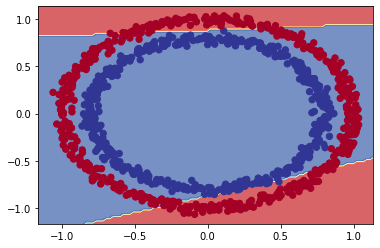

In [ ]:
# Check the decision boundary for the latest model
plot_decision_boundary(model=model_6, X=X, y=y)

In the above diagram the model assumes that the outer part belongs to red and the other parts belong to blue.

We add an output activation function this time. 
For **binary classification** we go with **sigmoid activation function** and 
For **multiclass classification** we go with **softmax activation function**

For non-linear data we have to go for non-linear activation functions.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"]
)

# 3. Fit the model
history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6954 - accuracy: 0.4875
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6870 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6801 - accuracy: 0.5470
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5004
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5259
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5237
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6806 - accuracy: 0.5427
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6808 - accuracy: 0.5396
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6795 - accuracy: 0.5360
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6769 - accuracy: 0.5418
Epoch 11/

In [ ]:
# Not a right approach to evaluate the model based on train data itself. 
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.29480037093162537, 0.9909999966621399]

Doing binary classification


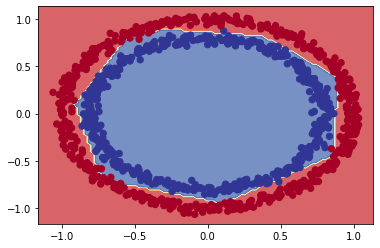

In [ ]:
plot_decision_boundary(model=model_7, X=X, y=y)

This is the best model we have got so far which divides the two classes in an excellent manner.

**The combination of linear and non linear functions is one of the key fundamentals of neural network**

### Activation Functions

In [ ]:
# Create sample tensor
A  = tf.cast(tf.range(-10,10) ,tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

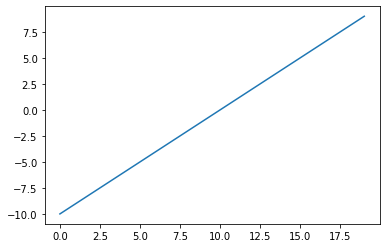

In [ ]:
plt.plot(A);

**Sigmoid function**



*Value lies between 0  and* 1

**1 / (1 + exp(x))**

In [ ]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

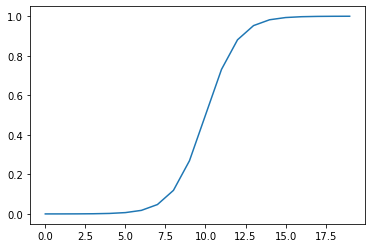

In [ ]:
# Plot the sigmoid curve
plt.plot(sigmoid(A));

As we can see the y axis the values are between 0 and 1

**ReLU Function**   ->  Rectified Linear Unit

y = max(0,x)

In [ ]:
def relu(x):
  return tf.maximum(0,x)
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

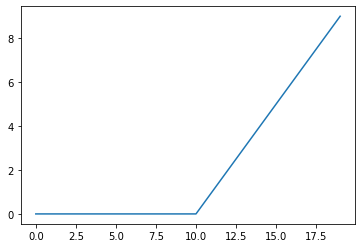

In [ ]:
plt.plot(relu(A))

**Linear Activation Function**

Returns the same tensor given as input

In [ ]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

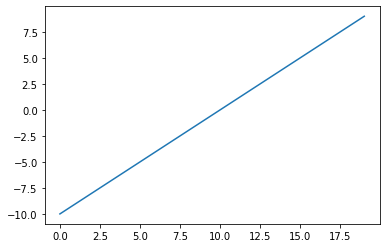

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

**Evaluating and improving our classification**

In [ ]:
X_train = X[:800]
X_test = X[800:]

y_train = y[:800]
y_test = y[800:]

In [ ]:
# Model 8 is similar to model 7, but the learning rate is 0.01 in case of Model 8 
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"]
)

# 3. Fit the model
history = model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5196
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5344
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6753 - accuracy: 0.5371
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.5943
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.5837
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.5798
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.6507
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6139 - accuracy: 0.7259
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.7919
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7704
Epoch 11/25
25/25 [

In [ ]:
score = model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


We get test loss and test accuracy while we do evaluation

In [ ]:
print("Test loss = "+str(score[0]))
print("Test accuracy = "+str(score[1]))

Test loss = 0.12468849867582321
Test accuracy = 1.0


**Comparison between train and test dataset with decision boundaries**

plt.subplot(1,2,1)

The figure has 1 row, 2 columns, and this plot is the first plot.

Doing binary classification
Doing binary classification


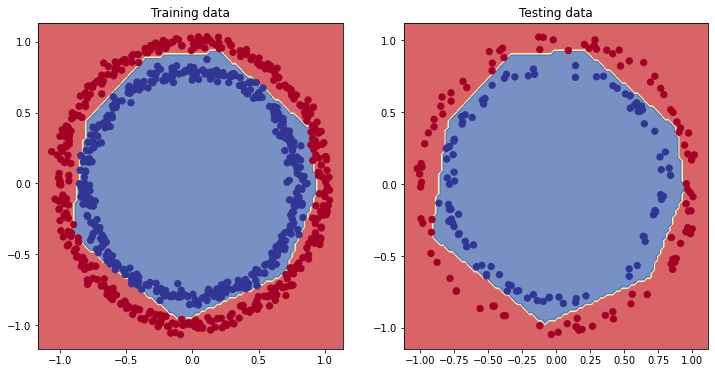

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training data")
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Testing data")
plot_decision_boundary(model=model_8, X=X_test, y=y_test)
plt.show();

The fit function returns the history object. It's **History.history** attribute is a record of training loss values and metric values at successive epochs.

In [ ]:
# Since there are 25 epochs there are 25 values for accuracy and loss 
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


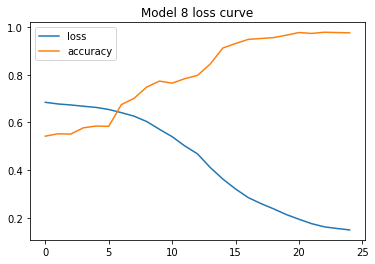

In [ ]:
# plot the loss curve
# As we can see from the below graph this is an ideal graph because the accuracy increases and the loss decreases

pd.DataFrame(history.history).plot()
plt.title("Model 8 loss curve")
plt.show();

### Finding the best learning rate

To find the ideal learning rate(the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - This is an extra piece of functionality, we can add **while** the model is training. That is we can increase or decrease the learning rate **while** the model is training
* Another model
* A modified loss curve plot.

We start at a certain value of a learning rate and we gradually increase or decrease the learning rate during training and then we make an other plot to plot the **loss vs learning rate** to find out the learning rate value the loss decreases the most. 

**Learning rate Scheduler**

At the beginning of every epoch, this callback gets the updated learning rate value from schedule function provided at _init_ with the current epoch and current learning rate and applies the updated learning rate of the optimizer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# Fit the model
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6909 - accuracy: 0.5016
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5065
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5094
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4864
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.4857
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5191
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5292
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5055
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4750
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.4965
Epoch 11/

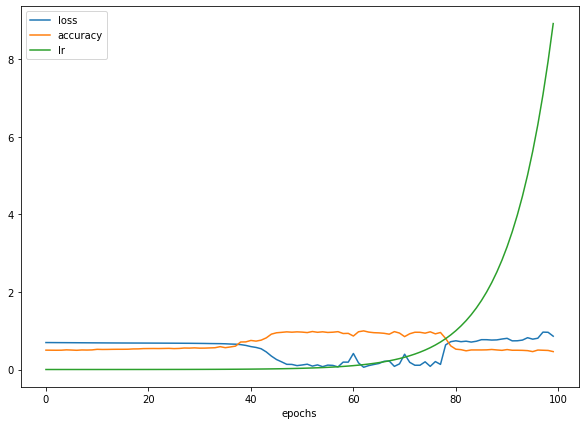

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel="epochs")

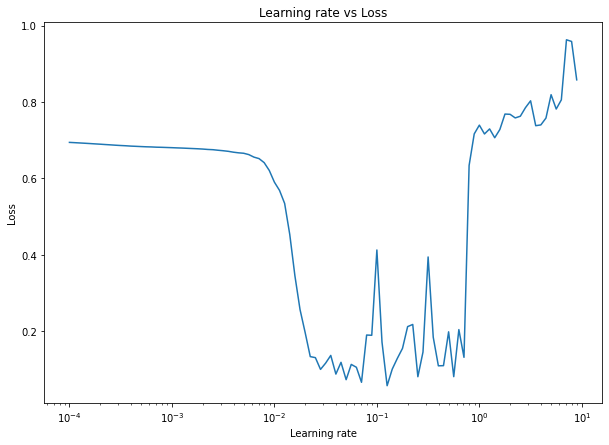

In [ ]:
# Plot the learning rate versus loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")
plt.show();

For every epoch the learning rate gets updated and with this we can find the learning rate with decreases loss

**The ideal value of the learning rate is where the loss is still decreasing but not quite flattened out.** From the above image we can see that the ideal learning rate would be between 1e-2 and 1e-1. We got very good results with model_8 and there we used a learning rate of 0.01 which is perfect.

From this image we can infer that 0.02 would be a good learning rate and we create a model with lesser epochs to check if our model is performing well than model_8(best model so far).



In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_10.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"]
)

# 3. Fit the model
history = model_10.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.5400
Epoch 2/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5511
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.5568
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.6380
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5957 - accuracy: 0.7609
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5134 - accuracy: 0.8213
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.8078
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8941
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.9016
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2665 - accuracy: 0.9386
Epoch 11/20
25/25 [

In [ ]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740181356668472, 0.9900000095367432]

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9850


[0.05770918354392052, 0.9850000143051147]

On comparing with Model_8, Model_10 performs slightly better. Changing the learning rate of a model can have a significant impact on the performance. 

Doing binary classification
Doing binary classification


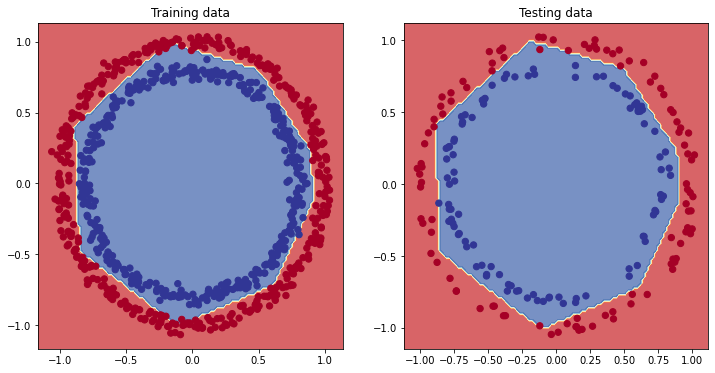

In [ ]:
# Compare performance of train and test dataset
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training data")
plot_decision_boundary(model=model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Testing data")
plot_decision_boundary(model=model_10, X=X_test, y=y_test)
plt.show();

### More classification evaluation methods


Alongside visualising our model results as much as possible, there are a handful of other classification evaluation methods.
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report - scikit learn

In [ ]:
# Check the accuracy of a model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740181356668472
Model accuracy on the test set: 99.00%


**Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds = model_10.predict(X_test)


In [ ]:
y_preds[:10], y_test[:10]

(array([[9.8526537e-01],
        [9.9923790e-01],
        [9.9032342e-01],
        [9.9706948e-01],
        [3.9622882e-01],
        [1.8126875e-02],
        [9.6829069e-01],
        [1.9746691e-02],
        [9.9967170e-01],
        [5.6460500e-04]], dtype=float32),
 array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]))

y_preds would have values in the probabilistic form because they have come straight out of **sigmoid or softmax activation functions**. if we give the y_preds directly to confusion_matrix it will throw an error because y_test will be in binary(0 or 1). So we have to convert y_preds before trying to construct the confusion matrix.

In [ ]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

### prettifying the confusion matrix

2nd video after 2 hours

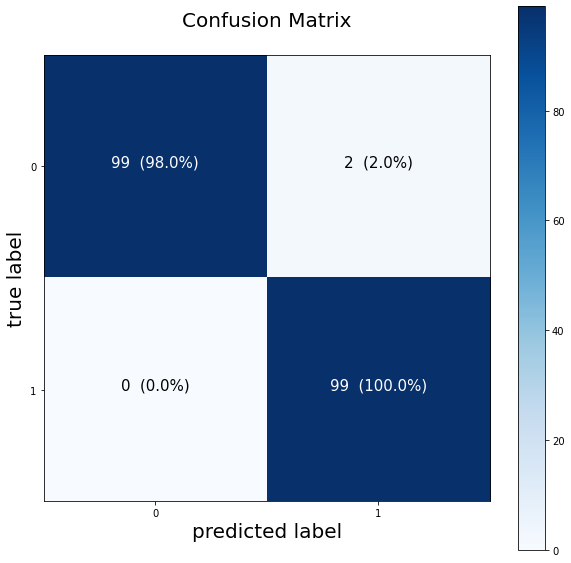

In [ ]:
import itertools
figsize = (10,10)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, tf.round(y_preds))

# Normalise our confusion matrix
conf_matrix_normalised = conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:,np.newaxis]
n_classes = conf_matrix.shape[0]

# let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot

cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(conf_matrix.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="predicted label",
       ylabel="true label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colours
threshold = (conf_matrix.max() + conf_matrix.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(conf_matrix.shape[0 ]), range(conf_matrix.shape[1])):
  plt.text(j , i ,f"{conf_matrix[i,j]}  ({conf_matrix_normalised[i,j]*100:.1f}%)",
           horizontalalignment = "center",
           color="white" if conf_matrix[i,j] > threshold else "black" ,
           size = 15)
